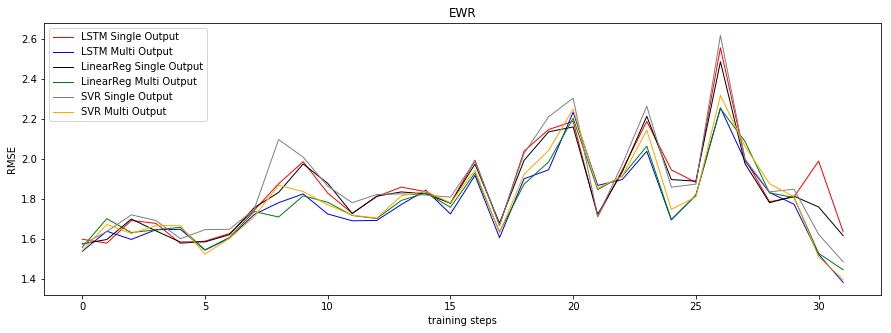

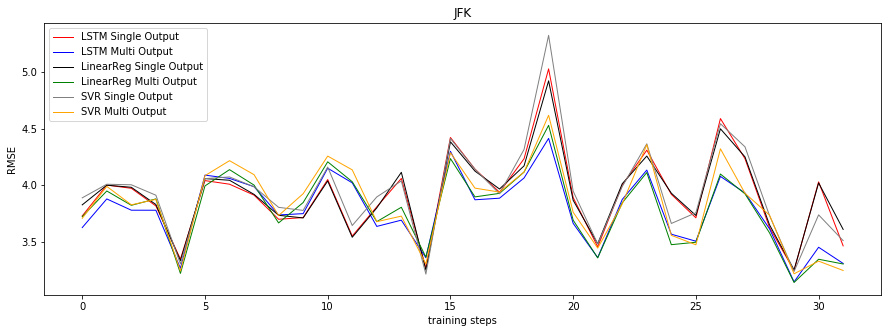

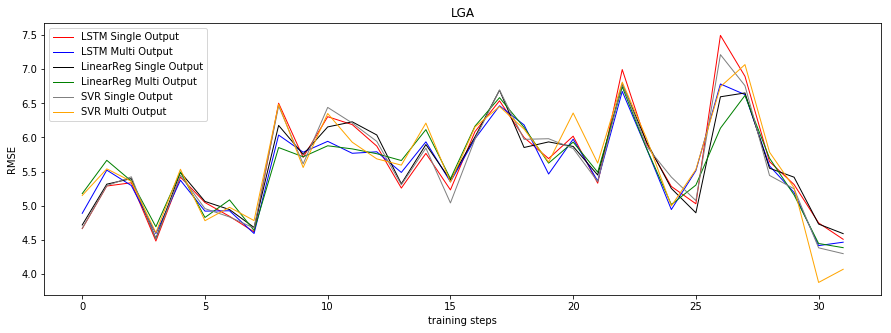

## EWR ##
+----+---------------+---------------+--------------+--------------+--------------+-------------+
|    |   LSTM_Single |   LReg_Single |   SVR_Single |   LSTM_Multi |   LReg_Multi |   SVR_Multi |
|----+---------------+---------------+--------------+--------------+--------------+-------------|
|  0 |        1.8667 |       1.84948 |      1.88026 |      1.78602 |      1.79871 |     1.81594 |
+----+---------------+---------------+--------------+--------------+--------------+-------------+


## JFK ##
+----+---------------+---------------+--------------+--------------+--------------+-------------+
|    |   LSTM_Single |   LReg_Single |   SVR_Single |   LSTM_Multi |   LReg_Multi |   SVR_Multi |
|----+---------------+---------------+--------------+--------------+--------------+-------------|
|  0 |       3.93416 |       3.93365 |      3.96741 |      3.79863 |       3.8136 |     3.86537 |
+----+---------------+---------------+--------------+--------------+--------------+-------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
%matplotlib inline


def load_data():

    # load files with errors from single output models
    EWR_SO = pd.read_csv('data/EWR_SO.csv', sep="\t")
    JFK_SO = pd.read_csv('data/JFK_SO.csv', sep="\t")
    LGA_SO = pd.read_csv('data/LGA_SO.csv', sep="\t")

    # load files with errors from multi output models
    EWR_MO = pd.read_csv('data/EWR_MO.csv', sep="\t")
    JFK_MO = pd.read_csv('data/JFK_MO.csv', sep="\t")
    LGA_MO = pd.read_csv('data/LGA_MO.csv', sep="\t")

    # load files with overall errors for the various approaches

    OV_EWR_SO = pd.read_csv('data/OV_EWR_SO.csv', sep="\t")
    OV_JFK_SO = pd.read_csv('data/OV_JFK_SO.csv', sep="\t")
    OV_LGA_SO = pd.read_csv('data/OV_LGA_SO.csv', sep="\t")

    OV_MO = pd.read_csv('data/OV_MO_errors.csv', sep="\t")

    return (EWR_SO, JFK_SO, LGA_SO, EWR_MO, JFK_MO, LGA_MO,
            OV_EWR_SO, OV_JFK_SO, OV_LGA_SO, OV_MO)


def show_errors(SO, MO, title):
    """ Show errors on a 5 day step window
    """
    fig = plt.figure(figsize=(15, 5))

    lstm_single, = plt.plot(SO['lstm'].values,
                            color="red", linewidth=1, label="LSTM Single Output")
    lstm_multiple, = plt.plot(
        MO['lstm'].values, color="blue", linewidth=1, label="LSTM Multi Output")

    lr_single, = plt.plot(SO['lr'].values, color="black",
                          linewidth=1, label="LinearReg Single Output")

    lr_multiple, = plt.plot(MO['lr'].values, color="green",
                            linewidth=1, label="LinearReg Multi Output")

    svr_single, = plt.plot(SO['svr'].values, color="gray",
                           linewidth=1, label="SVR Single Output")

    svr_multiple, = plt.plot(MO['svr'].values, color="orange",
                             linewidth=1, label="SVR Multi Output")

    plt.legend(handles=[lstm_single, lstm_multiple,
                        lr_single, lr_multiple, svr_single, svr_multiple])
    
    plt.xlabel('training steps')
    plt.ylabel('RMSE')
    plt.title(title)
    plt.show()
    
    
def get_overall_errors(SO, MO, CASE):
    
    df = pd.DataFrame()
    
    df['LSTM_Single'] = SO["LSTM_RMSE"].values
    df["LReg_Single"] = SO["LReg_RMSE"].values
    df["SVR_Single"] = SO["SVR_RMSE"].values
    
    df["LSTM_Multi"] = MO[CASE + "LSTM_RMSE"].values
    df["LReg_Multi"] = MO[CASE + "LReg_RMSE"].values
    df["SVR_Multi"] = MO[CASE + "SVR_RMSE"].values
    
    return df
    
def main():

    (EWR_SO, JFK_SO, LGA_SO, EWR_MO, JFK_MO, LGA_MO,
     OV_EWR_SO, OV_JFK_SO, OV_LGA_SO, OV_MO) = load_data()

    show_errors(EWR_SO, EWR_MO, "EWR")
    show_errors(JFK_SO, JFK_MO, "JFK")
    show_errors(LGA_SO, LGA_MO, "LGA")
    
    df = get_overall_errors(OV_EWR_SO, OV_MO, "EWR_")
    print "## EWR ##"
    print tabulate(df, headers='keys', tablefmt='psql')
    print "\n"
    df = get_overall_errors(OV_JFK_SO, OV_MO, "JFK_")
    print "## JFK ##"
    print tabulate(df, headers='keys', tablefmt='psql')
    print "\n"
    df = get_overall_errors(OV_LGA_SO, OV_MO, "LGA_")
    print "## LGA ##"
    print tabulate(df, headers='keys', tablefmt='psql')
    print "\n"

if __name__ == "__main__":
    main()